In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sisyphus2.backend import analysis, visualizations, simulation_tools
from sisyphus2.backend.networks import Model
from sisyphus2.tasks import task

In [2]:
rdm = task.rdm(stim_noise = 0.001, coherences = [.1], rec_noise = .01, N_rec = 3)

In [3]:
gen = rdm.generate_train_trials()

In [6]:
params = rdm.__dict__


In [5]:
model = Model(params)
learning_rate = .001 
training_iters = 300000
weights_path = '../weights/rdm_david.npz'
sess = tf.Session()
model.train(sess, gen, learning_rate = learning_rate, 
            training_iters = training_iters, weights_path = weights_path)
sess.close()

Iter 640, Minibatch Loss= 0.200021
Iter 1280, Minibatch Loss= 0.199986
Iter 1920, Minibatch Loss= 0.200003
Iter 2560, Minibatch Loss= 0.200037
Iter 3200, Minibatch Loss= 0.199961
Iter 3840, Minibatch Loss= 0.200057
Iter 4480, Minibatch Loss= 0.199989
Iter 5120, Minibatch Loss= 0.199998
Iter 5760, Minibatch Loss= 0.200161
Iter 6400, Minibatch Loss= 0.199706
Iter 7040, Minibatch Loss= 0.200029
Iter 7680, Minibatch Loss= 0.199952
Iter 8320, Minibatch Loss= 0.200069
Iter 8960, Minibatch Loss= 0.199954
Iter 9600, Minibatch Loss= 0.199763
Iter 10240, Minibatch Loss= 0.200010
Iter 10880, Minibatch Loss= 0.200170
Iter 11520, Minibatch Loss= 0.199972
Iter 12160, Minibatch Loss= 0.199956
Iter 12800, Minibatch Loss= 0.199884
Iter 13440, Minibatch Loss= 0.200020
Iter 14080, Minibatch Loss= 0.200051
Iter 14720, Minibatch Loss= 0.199893
Iter 15360, Minibatch Loss= 0.199732
Iter 16000, Minibatch Loss= 0.199968
Iter 16640, Minibatch Loss= 0.199924
Iter 17280, Minibatch Loss= 0.199799
Iter 17920, Minib

### take active matrix, during stimulus, take eigenspectrum slowest modes (vals near 0), project activity onto those modes
- look for way to show network is trying to "sum" the inputs



### Notes on drift diffusion:
- random walk until you hit a bound at $\pm B$
- "self excitation and lateral inhibition"



### analysis ideas:
- show that it is integrating (something about slow eigenmodes)
- see how the network responds to inputs outside of training
    - longer timescale for output
    - different length stimulus
- calculate fixed points across partitions, even outside of current partition



### training ideas:
- overtrain a lot to get more stable solution
- train using many more coherences
- decide on whether to use input/recurrent noise
- try fewer neurons

In [5]:
#weights_path = '../weights/rdm_oscillating.npz'

# Generate Trials

In [4]:
weights_path = '../weights/rdm_david.npz'

In [7]:
sim = simulation_tools.Simulator(params, weights_path=weights_path)
dat = gen.next()
trial = dat[0][0,:,:]
result = dat[1][0,:,:]

In [100]:
trial = np.vstack((trial, np.zeros((1000,1))))

In [8]:
output,states = sim.run_trial(trial)

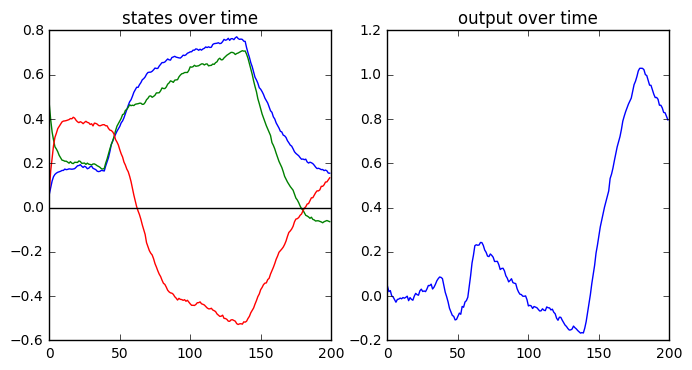

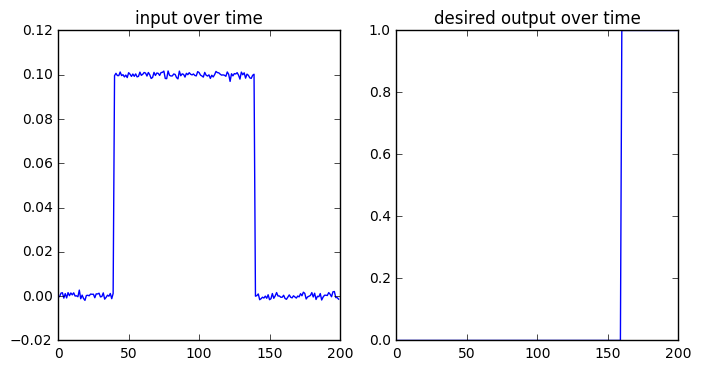

In [9]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(states[:,0,:])
plt.axhline(y=0, color='k')
plt.title("states over time")

plt.subplot(1,2,2)
plt.plot(output[:,0,0])
plt.title("output over time")
plt.show()

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(trial)
plt.title("input over time")

plt.subplot(1,2,2)
plt.plot(result)
plt.title("desired output over time")

plt.show()

In [10]:
analysis.hahnloser_fixed_point(sim, trial)

[-0.00043771]
[-0.00017114]
[ 0.00136804]
[ 0.0015605]
[-0.00087913]
[ 0.00115317]
[-0.00080427]
[ 0.00159732]
[ 0.00020962]
[ 0.00144339]
[ 0.00058136]
[ 0.0015053]
[  6.39691510e-05]
[ 0.00015937]
[-0.00025756]
[ 0.00273653]
[-0.00116649]
[ 0.00046864]
[-0.00105402]
[-0.00190388]
[ 0.00029049]
[ 0.00040223]
[ 0.00017366]
[ 0.00095437]
[ 0.00084109]
[ 0.0008779]
[-0.00070675]
[ 0.00103985]
[ 0.00098894]
[ 0.0013318]
[-0.00033602]
[-0.00015512]
[ 0.00147704]
[-0.00134342]
[-0.00054848]
[ 0.00044035]
[ -7.20493142e-06]
[ 0.00118841]
[-0.00113947]
[ 0.00118695]
[ 0.10106079]
[ 0.09966616]
[ 0.10077195]
[ 0.10062119]
[ 0.09967717]
[ 0.10098471]
[ 0.10107065]
[ 0.10164861]
[ 0.09831578]
[ 0.0982251]
[ 0.10169142]
[ 0.0997383]
[ 0.0994312]
[ 0.09946078]
[ 0.10033558]
[ 0.1001411]
[ 0.09871769]
[ 0.09812029]
[ 0.10162929]
[ 0.09953142]
[ 0.10039352]
[ 0.10014733]
[ 0.09894168]
[ 0.10063882]
[ 0.10002612]
[ 0.10092511]
[ 0.10020892]
[ 0.09992219]
[ 0.10034469]
[ 0.09966878]
[ 0.09947583]
[ 0.

[array([ 0.15738807,  0.26793738,  0.50258004]),
 array([ 0.15784193,  0.26484663,  0.49795558]),
 array([ 0.16046252,  0.2470008 ,  0.47125414]),
 array([ 0.16079019,  0.24476938,  0.46791541]),
 array([ 0.15663653,  0.27305528,  0.51023759]),
 array([ 0.16009667,  0.24949218,  0.47498181]),
 array([ 0.15676397,  0.27218742,  0.50893907]),
 array([ 0.16085287,  0.24434254,  0.46727677]),
 array([ 0.15849021,  0.26043198,  0.49135025]),
 array([ 0.16059079,  0.24612728,  0.46994714]),
 array([ 0.15912312,  0.25612195,  0.48490146]),
 array([ 0.1606962 ,  0.24540946,  0.46887312]),
 array([ 0.15824222,  0.26212071,  0.49387698]),
 array([ 0.15840465,  0.26101464,  0.49222205]),
 array([ 0.1576948 ,  0.2658486 ,  0.49945475]),
 array([ 0.16279247,  0.23113413,  0.44751397]),
 array([ 0.15614727,  0.27638709,  0.51522275]),
 array([ 0.1589312 ,  0.25742887,  0.48685691]),
 array([ 0.15633876,  0.27508302,  0.51327156]),
 array([ 0.1548918 ,  0.28493665,  0.52801485]),
 array([ 0.15862789,

# Daniel's old tests (only noise input, etc)

In [15]:
def plot_response_test(sim, x_test):
    
    n_trials = x_test.shape[0]
    choice = np.zeros(n_trials)
    resp = np.zeros(n_trials)

    for ii in range(n_trials):
        o,s = sim.run_trial(x_test[ii,:,:])
        resp[ii] = o[-1,0,:]
        choice[ii] = np.sign(resp[ii])
        
    mean_up = np.mean(x_test[choice==1,:,:],axis=0)
    mean_down = np.mean(x_test[choice==-1,:,:],axis=0)
    
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.plot(mean_up)
    plt.title('Average Up')
    plt.subplot(1,2,2)
    plt.plot(mean_down)
    plt.title('Average Down')
    
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.bar([0,1],[np.mean(choice==1),np.mean(choice==-1)])
    plt.xticks([.35,1.45],['Up','Down'])
    plt.xlabel('Percent Up')
    plt.subplot(1,2,2)
    plt.hist(resp,20)
    plt.title('Response Histogram')
    plt.show()
    
    return mean_up,mean_down,choice,resp

def coherence_test(sim,cohs = [.2,.1,.05,.04,.02],n_hidden=10,sigma_in = 0):
    
    n_cohs = len(cohs)
    a = np.zeros([200,1])
    a[40:140] = 1
    o = np.zeros([200,n_cohs])
    s = np.zeros([200,n_hidden,n_cohs])
    ev = np.zeros([200,n_cohs])
    for ii,coh in enumerate(cohs): 
        inp = coh*a + sigma_in*np.random.randn(len(a),1)
        o_temp,s_temp = sim.run_trial(inp,t_connectivity=False)
        o[:,ii] = o_temp[:,0,:].flatten()
        s[:,:,ii] = s_temp[:,0,:]
        ev[:,ii] = np.cumsum(coh*a)

    
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.plot(o)
    plt.title('output')
    
    plt.subplot(1,2,2)
    plt.plot(ev)
    plt.title('sum of evidence')
    
    plt.show()
    
    return o,s

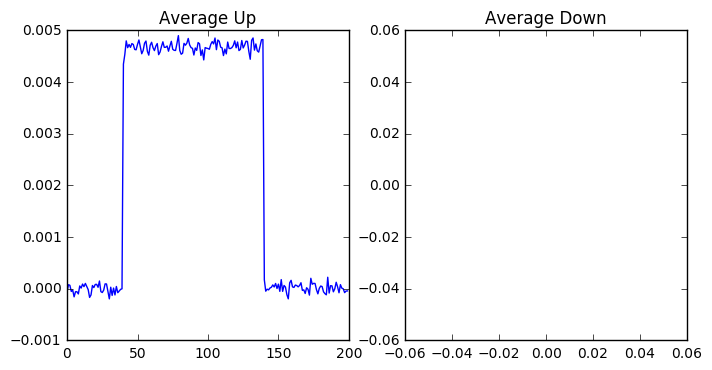

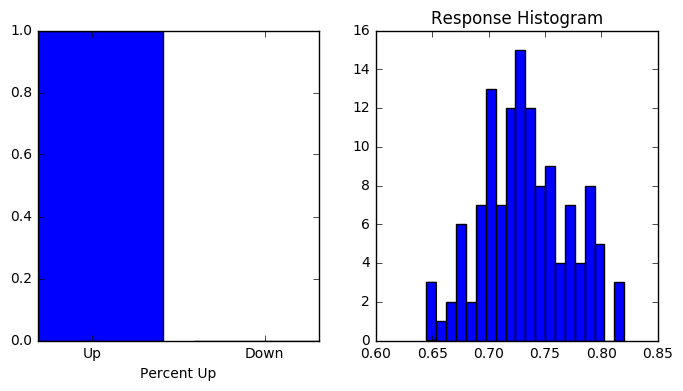

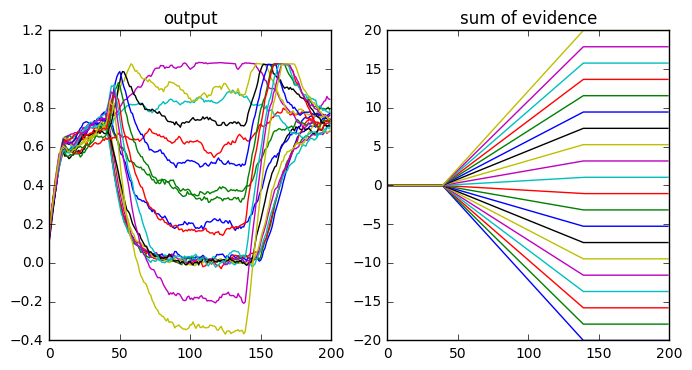

In [17]:
a = plot_response_test(sim, dat[0])
b = coherence_test(sim, cohs = np.linspace(-.2, .2, 20), n_hidden = 3)

# Distance to fixed point

In [78]:
def distance_to_fixed(sim, trial):
    outputs, states = sim.run_trial(trial)

    input_mat = np.matmul(np.absolute(sim.W_in), np.transpose(trial))

    #set identity matrix of proper size
    identity = np.diag(np.ones(sim.N_rec))

    dists = []
    for i, s in enumerate(states):
        # define active weight matrix
        Wp = np.copy(sim.W_rec)
        for index in range(sim.N_rec):
            if s[0,index] < 0:
                Wp[:, index] = 0
        Wp = Wp - identity
        
        #find fixed point at this time step
        # (even if it is outside the current partition)
        fixed_point = -1 * np.matmul(np.linalg.inv(Wp), sim.b_rec + input_mat[:,i])
        
        #calculate distance to fixed point
        d = np.linalg.norm(fixed_point - s)
        dists.append(d)
                       
    # plot results      
    plt.plot(dists)
    plt.title('distance to fixed point')
    plt.show()
    plt.plot(states[:,0,:])
    plt.axhline(y=0, color='k')
    plt.title('states')
    plt.show()
    plt.plot(np.transpose(input_mat))
    plt.title('input')
    plt.show()

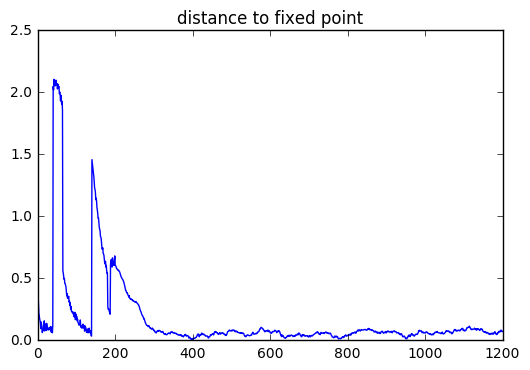

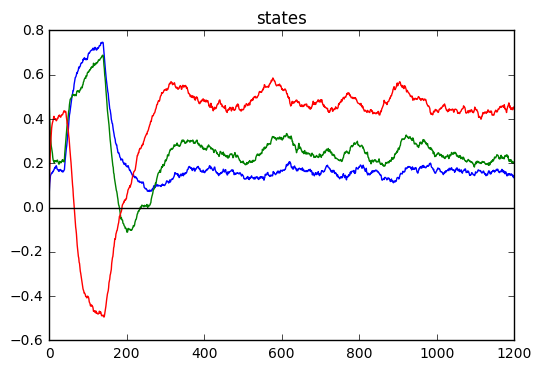

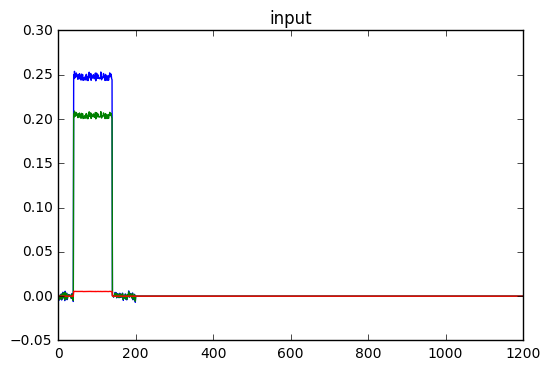

In [104]:
distance_to_fixed(sim, trial)

In [ ]:
# small network eigenvalue analysis

for 

In [18]:
def slow_modes_analysis(sim, trial):
    outputs, states = sim.run_trial(trial)

    input_mat = np.matmul(np.absolute(sim.W_in), np.transpose(trial))

    #set identity matrix of proper size
    identity = np.diag(np.ones(sim.N_rec))
    

    points = []
    for i, s in enumerate(states):
        # define active weight matrix
        Wp = np.copy(sim.W_rec)
        
        for index in range(sim.N_rec):
            if s[0,index] < 0:
                Wp[:, index] = 0
                
        plt.pcolor(Wp)
        plt.colorbar()
        plt.show()
        #print np.linalg.eig(Wp)

In [46]:
W = sim.W_rec - np.diag(np.ones(3))

In [77]:
np.linalg.eig(W / sim.tau)

(array([-0.02762825+0.j        , -0.00118588+0.00227491j,
        -0.00118588-0.00227491j]),
 array([[ 0.27921188+0.j        ,  0.21182608-0.19071858j,
          0.21182608+0.19071858j],
        [-0.57571546+0.j        ,  0.73197567+0.j        ,  0.73197567-0.j        ],
        [ 0.76850012+0.j        ,  0.44432776+0.43074424j,
          0.44432776-0.43074424j]]))

In [49]:
-1 * np.matmul(np.linalg.inv(W), sim.b_rec)

array([ 0.15813331,  0.26286239,  0.4949867 ])